In [17]:
import ast
with open('/Users/barrybrent/data/tauUpTo1000', 'r') as rfile: #Mathematica data from 'tauTo10^5maker Lehmer mthd.nb'
    content = rfile.read()
tau_list = content.replace('{', '[').replace('}', ']')
# Assume tau_list is your long string, as shown above
lines = tau_list.strip().split('\n')  # Split into lines, remove leading/trailing newlines

import ast #get Python data from tau_list
pairs = []
for line in lines:
    if line.strip():  # exclude empty lines
        pair = ast.literal_eval(line.strip())  # safely parse '[n, tau(n)]'
        # Optionally, ensure it is a pair of ints
        pairs.append((int(pair[0]), int(pair[1])))

print(pairs[:10])   # Show the first ten pairs as a check


[(1, 1), (2, -24), (3, 252), (4, -1472), (5, 4830), (6, -6048), (7, -16744), (8, 84480), (9, -113643), (10, -115920)]


In [23]:
import ast
with open('/Users/barrybrent/data/tauUpTo1000', 'r') as rfile:  #Mathematica data from 'tauTo10^5maker Lehmer mthd.nb'
    content = rfile.read()
tau_list = content.replace('{', '[').replace('}', ']')
# Assume tau_list is your long string, as shown above
lines = tau_list.strip().split('\n')  # Split into lines, remove leading/trailing newlines

import ast #get Python data from tau_list
pairs = []
for line in lines:
    if line.strip():  # exclude empty lines
        pair = ast.literal_eval(line.strip())  # safely parse '[n, tau(n)]'
        # Optionally, ensure it is a pair of ints
        pairs.append((int(pair[0]), int(pair[1])))

def Ramanujan_tau(n):
    return pairs[n-1][1]
print([Ramanujan_tau(n) for n in [1..5]])

[1, -24, 252, -1472, 4830]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


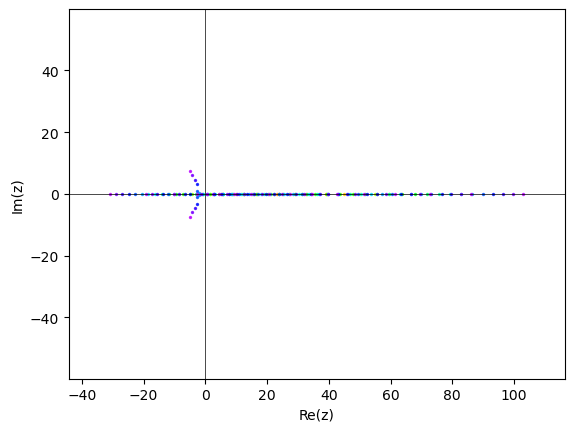

n interval:  (1, 20)


In [27]:
upper_bound=20
lower_bound=1
import matplotlib.pyplot as plt
import numpy as np

import ast
with open('/Users/barrybrent/data/tauUpTo1000', 'r') as rfile: #Mathematica data
    content = rfile.read()
tau_list = content.replace('{', '[').replace('}', ']')
# Assume tau_list is your long string, as shown above
lines = tau_list.strip().split('\n')  # Split into lines, remove leading/trailing newlines

import ast #get Python data from tau_list
pairs = []
for line in lines:
    if line.strip():  # exclude empty lines
        pair = ast.literal_eval(line.strip())  # safely parse '[n, tau(n)]'
        # Optionally, ensure it is a pair of ints
        pairs.append((int(pair[0]), int(pair[1])))

def Ramanujan_tau(n):
    return pairs[n-1][1]


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in range(lower_bound, upper_bound):
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * Ramanujan_tau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))
    print(n)


# --- 3. Plotting function with HSV hue colors and PDF save ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                          mode="bbox", save_path=None, show_plot=True):
    """
    Plot roots of polynomials with adjustable point sizes, unique HSV colors, and axis mode.
    Can automatically save to PDF for LaTeX.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
        save_path       : if not None, path to save PDF (e.g., 'niebur_roots.pdf')
        show_plot       : if True, display the plot; if False, only save
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    # HSV spacing factor to improve distinguishability
    spacing_factor = 0.8
    color_cycle = [plt.cm.hsv(spacing_factor * i / max(n_poly-1,1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- Axis scaling ---
    if mode == "bbox":
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot
   # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      #         ncol=min(n_poly, 10), frameon=False,
       #        scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    

    # --- Save PDF for LaTeX if requested ---
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')  # vector graphics for LaTeX

    # Show plot if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

    return all_roots


# --- 4. Run the plot and save as PDF ---
poly_list = [poly[1] for poly in char_polys]

roots = plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                              mode="bbox", save_path="niebur_tau_roots.pdf", show_plot=True)
print("n interval: ",(lower_bound,upper_bound))
# Optional: inspect numerical roots
#for i, rs in enumerate(roots):
#    print(f"Polynomial {i+1}: {rs}")


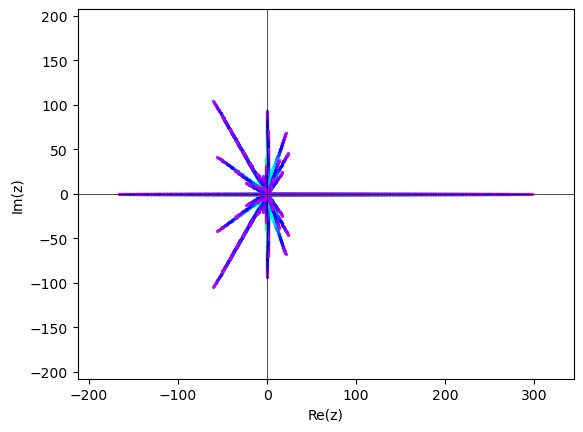

n interval:  (1, 100)


In [28]:
upper_bound=100
lower_bound=1
import matplotlib.pyplot as plt
import numpy as np

import ast
with open('/Users/barrybrent/data/tauUpTo1000', 'r') as rfile: #Mathematica data
    content = rfile.read()
tau_list = content.replace('{', '[').replace('}', ']')
# Assume tau_list is your long string, as shown above
lines = tau_list.strip().split('\n')  # Split into lines, remove leading/trailing newlines

import ast #get Python data from tau_list
pairs = []
for line in lines:
    if line.strip():  # exclude empty lines
        pair = ast.literal_eval(line.strip())  # safely parse '[n, tau(n)]'
        # Optionally, ensure it is a pair of ints
        pairs.append((int(pair[0]), int(pair[1])))

def Ramanujan_tau(n):
    return pairs[n-1][1]


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in range(lower_bound, upper_bound):
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * Ramanujan_tau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))



# --- 3. Plotting function with HSV hue colors and PDF save ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                          mode="bbox", save_path=None, show_plot=True):
    """
    Plot roots of polynomials with adjustable point sizes, unique HSV colors, and axis mode.
    Can automatically save to PDF for LaTeX.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
        save_path       : if not None, path to save PDF (e.g., 'niebur_roots.pdf')
        show_plot       : if True, display the plot; if False, only save
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    # HSV spacing factor to improve distinguishability
    spacing_factor = 0.8
    color_cycle = [plt.cm.hsv(spacing_factor * i / max(n_poly-1,1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=color_cycle[idx],
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- Axis scaling ---
    if mode == "bbox":
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot
   # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      #         ncol=min(n_poly, 10), frameon=False,
       #        scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    

    # --- Save PDF for LaTeX if requested ---
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')  # vector graphics for LaTeX

    # Show plot if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

    return all_roots


# --- 4. Run the plot and save as PDF ---
poly_list = [poly[1] for poly in char_polys]

roots = plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                              mode="bbox", save_path="niebur_tau_roots.pdf", show_plot=True)
print("n interval: ",(lower_bound,upper_bound))
# Optional: inspect numerical roots
#for i, rs in enumerate(roots):
#    print(f"Polynomial {i+1}: {rs}")

KeyboardInterrupt: 

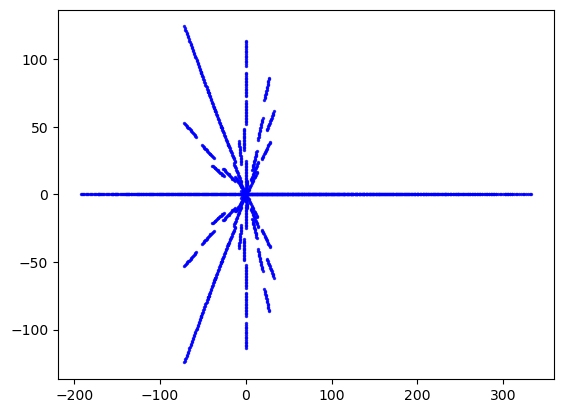

In [33]:
upper_bound=201
lower_bound=101
import matplotlib.pyplot as plt
import numpy as np

import ast
with open('/Users/barrybrent/data/tauUpTo1000', 'r') as rfile: #Mathematica data
    content = rfile.read()
tau_list = content.replace('{', '[').replace('}', ']')
# Assume tau_list is your long string, as shown above
lines = tau_list.strip().split('\n')  # Split into lines, remove leading/trailing newlines

import ast #get Python data from tau_list
pairs = []
for line in lines:
    if line.strip():  # exclude empty lines
        pair = ast.literal_eval(line.strip())  # safely parse '[n, tau(n)]'
        # Optionally, ensure it is a pair of ints
        pairs.append((int(pair[0]), int(pair[1])))

def Ramanujan_tau(n):
    return pairs[n-1][1]


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in range(lower_bound, upper_bound):
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * Ramanujan_tau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))
    


# --- 3. Plotting function with HSV hue colors and PDF save ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                          mode="bbox", save_path=None, show_plot=True):
    """
    Plot roots of polynomials with adjustable point sizes, unique HSV colors, and axis mode.
    Can automatically save to PDF for LaTeX.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
        save_path       : if not None, path to save PDF (e.g., 'niebur_roots.pdf')
        show_plot       : if True, display the plot; if False, only save
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    # HSV spacing factor to improve distinguishability
    spacing_factor = 0.8
    color_cycle = [plt.cm.hsv(spacing_factor * i / max(n_poly-1,1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
            color='blue',
            label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- Axis scaling ---
    if mode == "bbox":
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot
   # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      #         ncol=min(n_poly, 10), frameon=False,
       #        scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    

    # --- Save PDF for LaTeX if requested ---
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')  # vector graphics for LaTeX

    # Show plot if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

    return all_roots


# --- 4. Run the plot and save as PDF ---
poly_list = [poly[1] for poly in char_polys]

roots = plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                              mode="bbox", save_path="niebur_tau_roots.pdf", show_plot=True)
print("n interval: ",(lower_bound,upper_bound))
# Optional: inspect numerical roots
#for i, rs in enumerate(roots):
#    print(f"Polynomial {i+1}: {rs}")

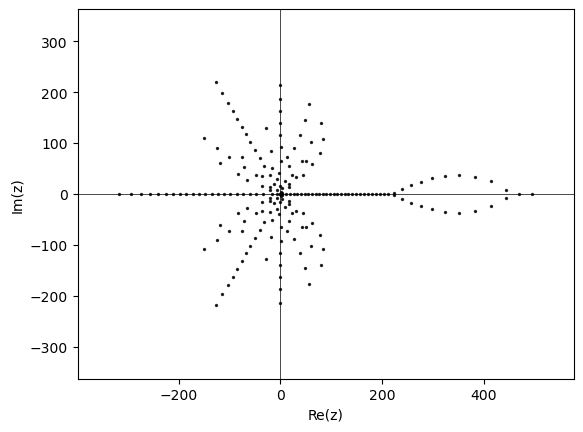

n interval:  (200, 200)


In [37]:
upper_bound=200
lower_bound=200
plot_color='black'
import matplotlib.pyplot as plt
import numpy as np

import ast
with open('/Users/barrybrent/data/tauUpTo1000', 'r') as rfile: #Mathematica data
    content = rfile.read()
tau_list = content.replace('{', '[').replace('}', ']')
# Assume tau_list is your long string, as shown above
lines = tau_list.strip().split('\n')  # Split into lines, remove leading/trailing newlines

import ast #get Python data from tau_list
pairs = []
for line in lines:
    if line.strip():  # exclude empty lines
        pair = ast.literal_eval(line.strip())  # safely parse '[n, tau(n)]'
        # Optionally, ensure it is a pair of ints
        pairs.append((int(pair[0]), int(pair[1])))

def Ramanujan_tau(n):
    return pairs[n-1][1]


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in [lower_bound..upper_bound]:
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * Ramanujan_tau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))
    


# --- 3. Plotting function with HSV hue colors and PDF save ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                          mode="bbox", save_path=None, show_plot=True):
    """
    Plot roots of polynomials with adjustable point sizes, unique HSV colors, and axis mode.
    Can automatically save to PDF for LaTeX.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
        save_path       : if not None, path to save PDF (e.g., 'niebur_roots.pdf')
        show_plot       : if True, display the plot; if False, only save
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    # HSV spacing factor to improve distinguishability
    spacing_factor = 0.8
    color_cycle = [plt.cm.hsv(spacing_factor * i / max(n_poly-1,1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=plot_color,
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- Axis scaling ---
    if mode == "bbox":
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot
   # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      #         ncol=min(n_poly, 10), frameon=False,
       #        scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    

    # --- Save PDF for LaTeX if requested ---
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')  # vector graphics for LaTeX

    # Show plot if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

    return all_roots


# --- 4. Run the plot and save as PDF ---
poly_list = [poly[1] for poly in char_polys]

roots = plot_polynomial_roots(poly_list, plot_point_size=2,legend_point_size=40, 
                              mode="bbox", save_path="niebur_tau_roots.pdf", show_plot=True)
print("n interval: ",(lower_bound,upper_bound))
# Optional: inspect numerical roots
#for i, rs in enumerate(roots):
#    print(f"Polynomial {i+1}: {rs}")

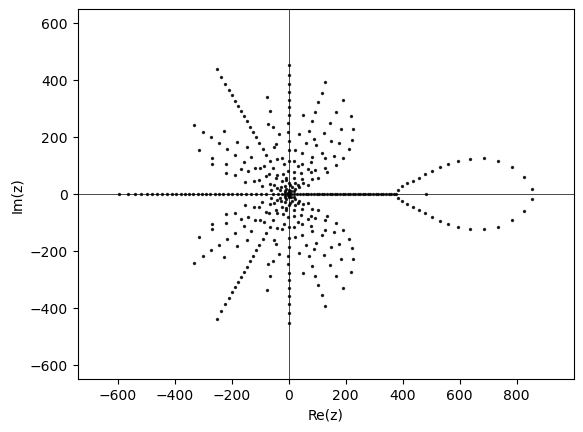

n interval:  (400, 400)


In [38]:
upper_bound=400
lower_bound=400
plot_color='black'
import matplotlib.pyplot as plt
import numpy as np

import ast
with open('/Users/barrybrent/data/tauUpTo1000', 'r') as rfile: #Mathematica data
    content = rfile.read()
tau_list = content.replace('{', '[').replace('}', ']')
# Assume tau_list is your long string, as shown above
lines = tau_list.strip().split('\n')  # Split into lines, remove leading/trailing newlines

import ast #get Python data from tau_list
pairs = []
for line in lines:
    if line.strip():  # exclude empty lines
        pair = ast.literal_eval(line.strip())  # safely parse '[n, tau(n)]'
        # Optionally, ensure it is a pair of ints
        pairs.append((int(pair[0]), int(pair[1])))

def Ramanujan_tau(n):
    return pairs[n-1][1]


# --- 2. Generate the characteristic polynomials ---
Rx.<x> = QQ[]
char_polys = []

for n in [lower_bound..upper_bound]:
    lst = []
    for k in range(0, n+1):
        lst += [factorial(n) * Ramanujan_tau(n-k+1) * x^k / factorial(k)]
    al = Rx(add(lst))
    char_polys.append((n, al))
    


# --- 3. Plotting function with HSV hue colors and PDF save ---
def plot_polynomial_roots(poly_list, plot_point_size=2, legend_point_size=40, 
                          mode="bbox", save_path=None, show_plot=True):
    """
    Plot roots of polynomials with adjustable point sizes, unique HSV colors, and axis mode.
    Can automatically save to PDF for LaTeX.

    Inputs:
        poly_list       : list of Sage polynomials over QQ
        plot_point_size : marker size for points in the plot
        legend_point_size : marker size for points in the legend
        mode            : "bbox" for bounding-box scaling, "radius" for square radius scaling
        save_path       : if not None, path to save PDF (e.g., 'niebur_roots.pdf')
        show_plot       : if True, display the plot; if False, only save
    Output:
        all_roots       : list of lists of numerical roots
    """
    n_poly = len(poly_list)
    # HSV spacing factor to improve distinguishability
    spacing_factor = 0.8
    color_cycle = [plt.cm.hsv(spacing_factor * i / max(n_poly-1,1)) for i in range(n_poly)]

    all_roots = []
    max_mod = 0.0
    xmax = -float("inf")
    xmin = float("inf")
    ymax = -float("inf")
    ymin = float("inf")

    # collect roots and plot
    for idx, p in enumerate(poly_list):
        roots = [complex(r) for r in p.roots(ring=CC, multiplicities=False)]
        all_roots.append(roots)
        if roots:
            for z in roots:
                modulus = abs(z)
                max_mod = max(max_mod, modulus)
                xmax = max(xmax, z.real)
                xmin = min(xmin, z.real)
                ymax = max(ymax, z.imag)
                ymin = min(ymin, z.imag)
            plt.scatter([z.real for z in roots], [z.imag for z in roots],
                        color=plot_color,
                        label=f"Poly {idx+1}", s=plot_point_size, alpha=0.8)

    if xmax == -float("inf"):
        raise ValueError("No roots found for any polynomial")

    # --- Axis scaling ---
    if mode == "bbox":
        dx = (xmax - xmin) * 0.1 if xmax > xmin else 1
        dy = (ymax - ymin) * 0.1 if ymax > ymin else 1
        plt.xlim(xmin - dx, xmax + dx)
        plt.ylim(ymin - dy, ymax + dy)
    elif mode == "radius":
        radius = 2 * max_mod if max_mod > 0 else 1
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
    else:
        raise ValueError("mode must be 'bbox' or 'radius'")

    # axes, aspect, labels
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")

    # Legend outside plot
   # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      #         ncol=min(n_poly, 10), frameon=False,
       #        scatterpoints=1, markerscale=legend_point_size / plot_point_size)

    

    # --- Save PDF for LaTeX if requested ---
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')  # vector graphics for LaTeX

    # Show plot if requested
    if show_plot:
        plt.show()
    else:
        plt.close()

    return all_roots


# --- 4. Run the plot and save as PDF ---
poly_list = [poly[1] for poly in char_polys]

roots = plot_polynomial_roots(poly_list, plot_point_size=2,legend_point_size=40, 
                              mode="bbox", save_path="niebur_tau_roots.pdf", show_plot=True)
print("n interval: ",(lower_bound,upper_bound))
# Optional: inspect numerical roots
#for i, rs in enumerate(roots):
#    print(f"Polynomial {i+1}: {rs}")

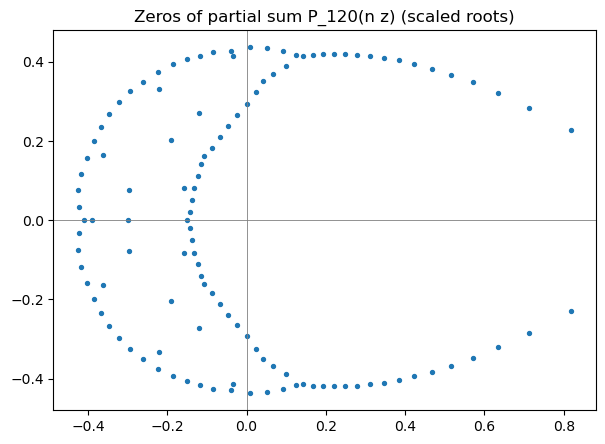

In [40]:
# chatGPT suggested a resemblance to this
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

def partial_exp_roots(n):
    # coefficients of P_n(z) = sum_{k=0}^n z^k / k!
    coeffs = [1.0 / math.factorial(k) for k in range(n+1)]
    # numpy Polynomial expects coeffs lowest-first (constant term first)
    p = Polynomial(coeffs)
    roots = p.roots()
    return roots

# Example run
n = 120
roots = partial_exp_roots(n)
scaled_roots = roots / n   # compare to Szegő limit curve if desired

plt.figure(figsize=(7,7))
plt.scatter(scaled_roots.real, scaled_roots.imag, s=8)
plt.axhline(0, color='gray', linewidth=0.6)
plt.axvline(0, color='gray', linewidth=0.6)
plt.title(f'Zeros of partial sum P_{n}(n z) (scaled roots)')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


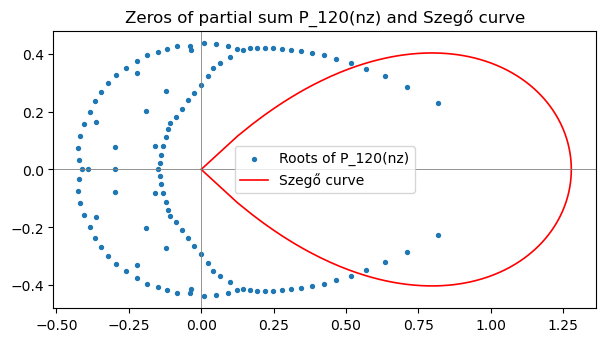

In [41]:
#Another chat GPT suggestion
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from mpmath import lambertw

def partial_exp_roots(n):
    # coefficients of P_n(z) = sum_{k=0}^n z^k / k!
    coeffs = [1.0 / math.factorial(k) for k in range(n+1)]
    # numpy Polynomial expects coeffs lowest-first (constant term first)
    p = Polynomial(coeffs)
    roots = p.roots()
    return roots

def szego_curve(num_points=400):
    # Parameterization: z(θ) = 1 + W(exp(-1 + iθ)), θ ∈ [-π,π]
    theta = np.linspace(-math.pi, math.pi, num_points)
    curve = [1 + lambertw(np.exp(-1 + 1j*t)) for t in theta]
    return np.array(curve, dtype=complex)

# Example run
n = 120
roots = partial_exp_roots(n)
scaled_roots = roots / n   # compare to Szegő curve

# Get Szegő curve points
curve = szego_curve()

# Plot
plt.figure(figsize=(7,7))
plt.scatter(scaled_roots.real, scaled_roots.imag, s=8, label=f'Roots of P_{n}(nz)')
plt.plot(curve.real, curve.imag, 'r-', linewidth=1.2, label='Szegő curve')
plt.axhline(0, color='gray', linewidth=0.6)
plt.axvline(0, color='gray', linewidth=0.6)
plt.title(f'Zeros of partial sum P_{n}(nz) and Szegő curve')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
